In [1]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import datasets
import seaborn as sns

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [2]:
hitter_stats = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/巨量資料應用專題/bat.csv")

In [3]:
hitter_stats

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,KC,2019-10-04,81.7,-2.51,6.19,"Melancon, Mark",543939,453343,strikeout,swinging_strike_blocked,...,3,0,3,0,3,Strategic,Standard,14.0,0.032,-0.390
1,KC,2019-10-04,82.0,-2.67,6.27,"Melancon, Mark",543939,453343,NaN,swinging_strike_blocked,...,3,0,3,0,3,Strategic,Standard,15.0,0.000,-0.103
2,KC,2019-10-04,80.8,-2.49,6.24,"Melancon, Mark",543939,453343,NaN,called_strike,...,3,0,3,0,3,Strategic,Standard,12.0,0.000,-0.064
3,KC,2019-10-04,81.2,-2.54,6.25,"Melancon, Mark",543939,453343,NaN,ball,...,3,0,3,0,3,Strategic,Standard,9.0,0.000,0.053
4,KC,2019-10-04,81.1,-2.67,6.23,"Melancon, Mark",543939,453343,NaN,blocked_ball,...,3,0,3,0,3,Strategic,Standard,15.0,0.000,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,KC,2016-04-03,84.0,-1.57,5.42,"Vólquez, Edinson",434158,450172,NaN,foul,...,0,0,0,0,0,Standard,Standard,56.0,0.000,0.000
2924548,SI,2016-04-03,96.6,-1.17,5.44,"Vólquez, Edinson",434158,450172,NaN,ball,...,0,0,0,0,0,Standard,Standard,254.0,0.000,0.040
2924549,SI,2016-04-03,96.9,-1.05,5.38,"Vólquez, Edinson",434158,450172,NaN,ball,...,0,0,0,0,0,Standard,Standard,247.0,0.000,0.018
2924550,KC,2016-04-03,82.5,-1.46,5.48,"Vólquez, Edinson",434158,450172,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,50.0,0.000,-0.050


In [4]:
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc','game_year'] 

hitter = hitter_stats[baseball_cols]

In [5]:
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
1,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,82.0,543939,NaN,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
2,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,80.8,543939,NaN,called_strike,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
3,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.2,543939,NaN,ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
4,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.1,543939,NaN,blocked_ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,84.0,434158,NaN,foul,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924548,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.6,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924549,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924550,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.5,434158,NaN,called_strike,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016


In [6]:
hitter.dropna(subset=['events'], inplace=True)
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
5,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,91.8,425877,strikeout,foul_tip,NaN,Yadier Molina strikes out on a foul tip.,NaN,NaN,NaN,2019
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016


In [6]:
hitter.events.value_counts(dropna=False)

NaN                             2176110
field_out                        296899
strikeout                        164599
single                           107798
walk                              59616
double                            33769
home_run                          24342
force_out                         14880
grounded_into_double_play         14575
hit_by_pitch                       7408
field_error                        5377
sac_fly                            4743
sac_bunt                           3588
triple                             3328
double_play                        1745
fielders_choice                    1489
fielders_choice_out                1238
intent_walk                         951
caught_stealing_2b                  804
strikeout_double_play               600
batter_interference                 163
other_out                           155
catcher_interf                       67
sac_fly_double_play                  67
caught_stealing_3b                   55


In [8]:
null_batted_ball_type = hitter.bb_type.isnull()

In [9]:
hitter[null_batted_ball_type].events.value_counts(dropna=False)

NaN                             2176110
strikeout                        164599
walk                              59616
hit_by_pitch                       7408
intent_walk                         951
caught_stealing_2b                  804
strikeout_double_play               600
other_out                           155
catcher_interf                       64
caught_stealing_3b                   55
batter_interference                  53
pickoff_1b                           38
pickoff_2b                           32
caught_stealing_home                 28
wild_pitch                           19
pickoff_caught_stealing_home          7
pickoff_caught_stealing_2b            7
passed_ball                           5
stolen_base_2b                        5
pickoff_caught_stealing_3b            4
pickoff_3b                            4
game_advisory                         3
runner_double_play                    2
ejection                              2
stolen_base_3b                        1


In [10]:
hitter.dropna(subset=['bb_type'], inplace=True)

In [11]:
hitter.events.value_counts(dropna=False)

field_out                    296899
single                       107798
double                        33769
home_run                      24342
force_out                     14880
grounded_into_double_play     14575
field_error                    5377
sac_fly                        4743
sac_bunt                       3588
triple                         3328
double_play                    1745
fielders_choice                1489
fielders_choice_out            1238
batter_interference             110
sac_fly_double_play              67
triple_play                      19
sac_bunt_double_play              5
catcher_interf                    3
game_advisory                     3
Name: events, dtype: int64

In [11]:
hitter.bb_type.value_counts(dropna=False)

ground_ball    231048
line_drive     129661
fly_ball       116223
popup           37046
Name: bb_type, dtype: int64

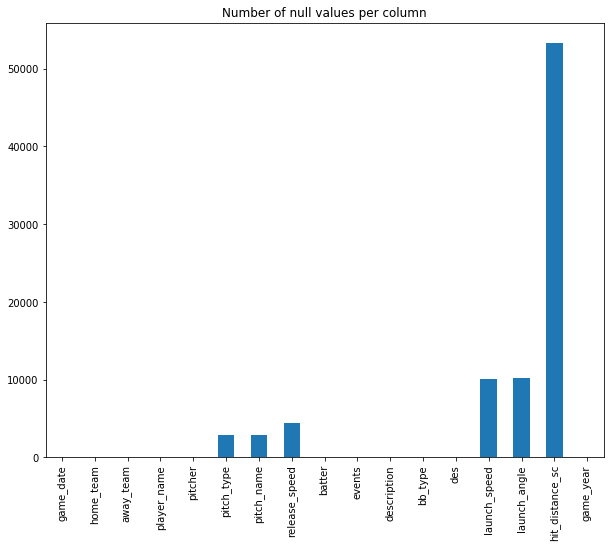

In [12]:
hitter.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

In [13]:
hitter.dropna(subset=['pitch_name', 'release_speed', 'launch_angle','launch_speed'], inplace=True)

In [14]:
hitter.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type             0
pitch_name             0
release_speed          0
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed           0
launch_angle           0
hit_distance_sc    43041
game_year              0
dtype: int64

In [15]:
hitter.bb_type.value_counts(dropna=False)

ground_ball    223416
line_drive     128338
fly_ball       115122
popup           36597
Name: bb_type, dtype: int64

In [18]:
hitter.events.value_counts(dropna=False)

field_out                    293213
single                       105577
double                        33400
home_run                      24132
force_out                     14409
grounded_into_double_play     14350
field_error                    5280
sac_fly                        4674
triple                         3282
double_play                    1714
fielders_choice                1420
fielders_choice_out            1146
sac_bunt                        717
batter_interference              68
sac_fly_double_play              66
triple_play                      19
catcher_interf                    3
game_advisory                     2
sac_bunt_double_play              1
Name: events, dtype: int64

In [19]:
hitter.bb_type.value_counts(dropna=False)

ground_ball    223416
line_drive     128338
fly_ball       115122
popup           36597
Name: bb_type, dtype: int64

In [20]:
hitter.bb_type.value_counts(dropna=False).sum()

503473

In [21]:
pd.crosstab(hitter.events, hitter.bb_type, margins=True, margins_name='Total', dropna=False)

bb_type,fly_ball,ground_ball,line_drive,popup,Total
events,,,,,
batter_interference,0,59,0,9,68
catcher_interf,0,2,1,0,3
double,5103,4480,23649,168,33400
double_play,302,153,1185,74,1714
field_error,246,4654,233,147,5280
field_out,80867,132330,44461,35555,293213
fielders_choice,1,1418,1,0,1420
fielders_choice_out,0,1143,2,1,1146
force_out,61,14181,96,71,14409


In [22]:
hitter.drop(['home_team', 'away_team', 'player_name', 'des'], axis=1).describe(include='object')

,game_date,pitch_type,pitch_name,events,description,bb_type
count,503473,503473,503473,503473,503473,503473
unique,800,14,14,19,1,4
top,2017-09-02,FF,4-Seam Fastball,field_out,hit_into_play,ground_ball
freq,913,168103,168103,293213,503473,223416


In [24]:
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,hit_into_play,ground_ball,"Freddie Freeman grounds out, first baseman Pau...",84.5,-11.0,13.0,2019
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,hit_into_play,line_drive,Dexter Fowler lines out sharply to center fiel...,106.4,15.0,351.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016


In [27]:
pd.crosstab(hitter.pitch_type, hitter.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_type,,,,,
CH,14228,14038,14784,15791,58841
CU,9262,8502,8340,9392,35496
EP,22,33,40,12,107
FC,6763,7216,7597,8634,30210
FF,43544,41643,41628,41288,168103
FO,43,46,8,7,104
FS,1919,2100,1796,1765,7580
FT,16919,19646,16589,12620,65774
KC,2264,3189,2887,2318,10658


In [28]:
hitter['pitch_name_low_freq'] = np.where(hitter.pitch_name.isin(['Eephus', 'Fastball', 'Forkball', 'Pitch Out', 'Screwball', 'Unknown']), 1, 0)

In [30]:
hitter.pitch_name_low_freq.value_counts(dropna=False)

0    503238
1       235
Name: pitch_name_low_freq, dtype: int64

In [32]:
hitter_new = hitter[hitter.pitch_name_low_freq == 0]
hitter_new.drop('pitch_name_low_freq', axis=1, inplace=True)

In [34]:
pd.crosstab(hitter_new.pitch_type, hitter_new.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_type,,,,,
CH,14228,14038,14784,15791,58841
CU,9262,8502,8340,9392,35496
FC,6763,7216,7597,8634,30210
FF,43544,41643,41628,41288,168103
FS,1919,2100,1796,1765,7580
FT,16919,19646,16589,12620,65774
KC,2264,3189,2887,2318,10658
KN,745,539,141,29,1454
SI,13068,11344,12575,11531,48518


In [35]:
hitter_new

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,hit_into_play,ground_ball,"Freddie Freeman grounds out, first baseman Pau...",84.5,-11.0,13.0,2019
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,hit_into_play,line_drive,Dexter Fowler lines out sharply to center fiel...,106.4,15.0,351.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016


In [36]:
hitter_new['hr'] = hitter_new.events.apply(lambda events: 1 if events == 'home_run' else 0)

In [38]:
print(hitter_new.hr.value_counts(dropna=False))
round(hitter_new.hr.value_counts(dropna=False) / len(hitter_new), 3)

0    479119
1     24119
Name: hr, dtype: int64


0    0.952
1    0.048
Name: hr, dtype: float64

In [39]:
hitter_new['xbh'] = np.where(hitter_new.events.isin(['double', 'triple', 'home_run']), 1, 0)

In [40]:
print(hitter_new.xbh.value_counts(dropna=False))
round(hitter_new.xbh.value_counts(dropna=False) / len(hitter_new), 3)

0    442451
1     60787
Name: xbh, dtype: int64


0    0.879
1    0.121
Name: xbh, dtype: float64

In [41]:
hitter_new

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year,hr,xbh
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019,0,0
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019,0,0
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019,0,0
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,hit_into_play,ground_ball,"Freddie Freeman grounds out, first baseman Pau...",84.5,-11.0,13.0,2019,0,0
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,hit_into_play,line_drive,Dexter Fowler lines out sharply to center fiel...,106.4,15.0,351.0,2019,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016,0,0
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016,0,0
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016,0,0
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016,0,0


In [42]:
baseball_correlations = hitter_new.drop(['pitcher', 'batter'], axis=1).corr(method='pearson')
baseball_correlations

,release_speed,launch_speed,launch_angle,hit_distance_sc,game_year,hr,xbh
release_speed,1.000000,0.089709,0.009115,0.018607,-0.014809,-0.002181,-0.002540
launch_speed,0.089709,1.000000,0.121034,0.361586,0.013183,0.250915,0.315052
launch_angle,0.009115,0.121034,1.000000,0.722894,0.016595,0.133472,0.126675
hit_distance_sc,0.018607,0.361586,0.722894,1.000000,0.007159,0.387358,0.421713
game_year,-0.014809,0.013183,0.016595,0.007159,1.000000,0.013809,0.012151
hr,-0.002181,0.250915,0.133472,0.387358,0.013809,1.000000,0.605320
xbh,-0.002540,0.315052,0.126675,0.421713,0.012151,0.605320,1.000000


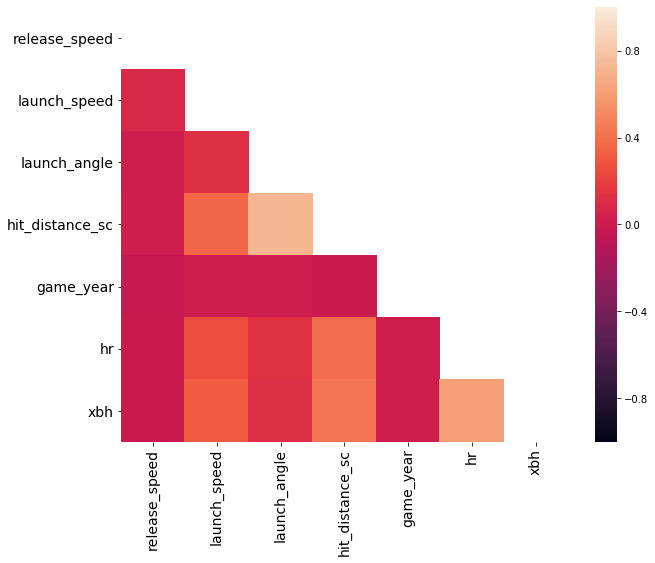

In [45]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(baseball_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(baseball_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();

In [46]:
hitter_new.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type             0
pitch_name             0
release_speed          0
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed           0
launch_angle           0
hit_distance_sc    43029
game_year              0
hr                     0
xbh                    0
dtype: int64

In [47]:
hitter_new.dropna(subset=['hit_distance_sc'], inplace=True)

In [120]:
hitter_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460209 entries, 11 to 2924546
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_date                   460209 non-null  object 
 1   home_team                   460209 non-null  object 
 2   away_team                   460209 non-null  object 
 3   player_name                 460209 non-null  object 
 4   pitcher                     460209 non-null  int64  
 5   pitch_type                  460209 non-null  object 
 6   pitch_name                  460209 non-null  object 
 7   release_speed               460209 non-null  float64
 8   batter                      460209 non-null  int64  
 9   events                      460209 non-null  object 
 10  description                 460209 non-null  object 
 11  bb_type                     460209 non-null  object 
 12  des                         460209 non-null  object 
 13  launch_speed

# hit distance

In [121]:
feature_cols = ['pitch_name_4-Seam Fastball', 'pitch_name_Changeup', 'pitch_name_Curveball', 'pitch_name_Cutter',
                'pitch_name_Knuckleball', 'pitch_name_Knuckle Curve', 'pitch_name_Sinker', 'pitch_name_Slider', 'pitch_name_Split-Finger',
                'release_speed', 'launch_speed', 'launch_angle']

In [88]:
X = hitter_new2[feature_cols]
y = hitter_new2.hit_distance_sc

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

In [57]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
r_sq = linreg.score(X_train, y_train)
r_sq

0.5844653798614017

In [59]:
name = X.columns
coef = np.round(linreg.coef_, 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,pitch_name_4-Seam Fastball,6.8314
1,pitch_name_Changeup,1.848
2,pitch_name_Curveball,-0.6176
3,pitch_name_Cutter,2.3064
4,pitch_name_Knuckleball,-0.188
5,pitch_name_Knuckle Curve,-3.0436
6,pitch_name_Sinker,-1.6597
7,pitch_name_Slider,2.3518
8,pitch_name_Split-Finger,-0.5374
9,release_speed,-0.3928


In [60]:
print('R^2:', round(linreg.score(X_test, y_test), 3))

R^2: 0.583


In [61]:
y_pred = linreg.predict(X_test)

In [62]:
print('Training MSE:', round(metrics.mean_squared_error(y_train, linreg.predict(X_train)), 3))

print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train))), 3))
print('')

print('Testing MSE:', round(metrics.mean_squared_error(y_test, y_pred), 3))

print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))

Training MSE: 7861.006
Training RMSE: 88.662

Testing MSE: 7868.943
Testing RMSE: 88.707


# 我是分隔線---------------------------------------------------------------

In [98]:
def prediction(X_test, clf_object): 
  
    # Predict the class labels using the classifier model
    y_pred_class = clf_object.predict(X_test)

    print('Predicted values:')
    print(y_pred_class)
    print('')
    return y_pred_class

In [99]:
def cal_accuracy(y_test, y_pred_class, clf_object):
      
    print('Training accuracy score:', round(metrics.accuracy_score(y_train, clf_object.predict(X_train)), 4))

    print('Testing accuracy score :', round(metrics.accuracy_score(y_test, y_pred_class), 4))
    
    if metrics.accuracy_score(y_train, clf_object.predict(X_train)) < metrics.accuracy_score(y_test, y_pred_class):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred_class)
    print(pd.DataFrame(conmat,
                       index=['True No XBH', 'True XBH'],
                       columns=['Predicted No XBH', 'Predicted XBH']))
    print('')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_class))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test, y_pred_class), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test, y_pred_class), 3))

In [111]:
def cal_accuracy2(y_test, y_pred_class, clf_object):
      
    print('Training accuracy score:', round(metrics.accuracy_score(y_train, clf_object.predict(X_train)), 4))

    print('Testing accuracy score :', round(metrics.accuracy_score(y_test, y_pred_class), 4))
    
    if metrics.accuracy_score(y_train, clf_object.predict(X_train)) < metrics.accuracy_score(y_test, y_pred_class):
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred_class)
    print(pd.DataFrame(conmat,
                       index=['True No HR', 'True HR'],
                       columns=['Predicted No HR', 'Predicted HR']))
    print('')
    
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_class))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    print('ROC AUC:', round(metrics.roc_auc_score(y_test, y_pred_class), 3))
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log loss:', round(metrics.log_loss(y_test, y_pred_class), 3))

# 球種編號

In [133]:
hitter_new2['pitch_name_num'] = hitter_new2.pitch_name.map({'4-Seam Fastball':1, '2-Seam Fastball':2, 'Slider':3, 'Changeup':4, 'Sinker':5, 'Curveball':6, 'Cutter':7, 'Knuckle Curve':8, 'Split-Finger':9, 'Knuckleball':10})

In [134]:
hitter_new2.pitch_name.value_counts()

4-Seam Fastball    154745
Slider              69502
2-Seam Fastball     60278
Changeup            53255
Sinker              44193
Curveball           32583
Cutter              27777
Knuckle Curve        9771
Split-Finger         6802
Knuckleball          1303
Name: pitch_name, dtype: int64

In [135]:
hitter_new2.pitch_name_num.value_counts()

1     154745
3      69502
2      60278
4      53255
5      44193
6      32583
7      27777
8       9771
9       6802
10      1303
Name: pitch_name_num, dtype: int64

In [136]:
hitter_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460209 entries, 11 to 2924546
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_date                   460209 non-null  object 
 1   home_team                   460209 non-null  object 
 2   away_team                   460209 non-null  object 
 3   player_name                 460209 non-null  object 
 4   pitcher                     460209 non-null  int64  
 5   pitch_type                  460209 non-null  object 
 6   pitch_name                  460209 non-null  object 
 7   release_speed               460209 non-null  float64
 8   batter                      460209 non-null  int64  
 9   events                      460209 non-null  object 
 10  description                 460209 non-null  object 
 11  bb_type                     460209 non-null  object 
 12  des                         460209 non-null  object 
 13  launch_speed

In [137]:
hitter_new2.isnull().sum()

game_date                     0
home_team                     0
away_team                     0
player_name                   0
pitcher                       0
pitch_type                    0
pitch_name                    0
release_speed                 0
batter                        0
events                        0
description                   0
bb_type                       0
des                           0
launch_speed                  0
launch_angle                  0
hit_distance_sc               0
game_year                     0
hr                            0
xbh                           0
pitch_name_4-Seam Fastball    0
pitch_name_Changeup           0
pitch_name_Curveball          0
pitch_name_Cutter             0
pitch_name_Knuckle Curve      0
pitch_name_Knuckleball        0
pitch_name_Sinker             0
pitch_name_Slider             0
pitch_name_Split-Finger       0
pitch_name_num                0
dtype: int64

# homerun

In [138]:
feature_cols2 = ['pitch_name_num','release_speed', 'launch_speed', 'launch_angle']

In [139]:
X1 = hitter_new2[feature_cols2]
y1 = hitter_new2.hr

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.70, test_size=0.30, random_state=65)

In [141]:
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))

dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    305442
1     16704
Name: hr, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.949
Baseline accuracy in test dataset: 0.949


In [142]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [143]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [144]:
rf_gini1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=46)
rf_gini1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [145]:
y_pred_class = rf_gini1.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
y_pred_prob = rf_gini1.predict_proba(X_test)[:, 1]
y_pred_prob = rf_gini1.predict_proba(X_test)
y_pred_prob

array([[0.94336199, 0.05663801],
       [0.98096243, 0.01903757],
       [0.95217388, 0.04782612],
       ...,
       [0.97770233, 0.02229767],
       [0.99763257, 0.00236743],
       [0.99743301, 0.00256699]])

In [147]:
print('Results Using Gini Index:')
y_pred_gini = prediction(X_test, rf_gini1)
cal_accuracy2(y_test, y_pred_gini, rf_gini1)

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]

Training accuracy score: 0.9643
Testing accuracy score : 0.9647
Testing accuracy > Training accuracy
-> Not overfitting

Confusion Matrix:
            Predicted No HR  Predicted HR
True No HR           130486           467
True HR                4404          2706

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    130953
           1       0.85      0.38      0.53      7110

    accuracy                           0.96    138063
   macro avg       0.91      0.69      0.75    138063
weighted avg       0.96      0.96      0.96    138063


ROC AUC: 0.689

Log loss: 1.219


# XBH

In [148]:
X3 = hitter_new2[feature_cols2]
y3= hitter_new2.xbh

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, train_size=0.70, test_size=0.30, random_state=65)

In [150]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [151]:
rf_gini = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=46)
rf_gini.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [152]:
y_pred_class = rf_gini.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
y_pred_prob = rf_gini.predict_proba(X_test)[:, 1]
y_pred_prob = rf_gini.predict_proba(X_test)
y_pred_prob

array([[0.83948683, 0.16051317],
       [0.94152618, 0.05847382],
       [0.86108224, 0.13891776],
       ...,
       [0.90848939, 0.09151061],
       [0.90551042, 0.09448958],
       [0.96623194, 0.03376806]])

In [154]:
print('Results Using Gini Index:')
y_pred_gini = prediction(X_test, rf_gini)
cal_accuracy(y_test, y_pred_gini, rf_gini)

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]

Training accuracy score: 0.9005
Testing accuracy score : 0.9033
Testing accuracy > Training accuracy
-> Not overfitting

Confusion Matrix:
             Predicted No XBH  Predicted XBH
True No XBH            119006           1297
True XBH                12051           5709

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    120303
           1       0.81      0.32      0.46     17760

    accuracy                           0.90    138063
   macro avg       0.86      0.66      0.70    138063
weighted avg       0.90      0.90      0.88    138063


ROC AUC: 0.655

Log loss: 3.339
